In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data, preprocessed and splitted earlier

In [3]:
train = pd.read_csv('data/train_preprocessed.csv')
test = pd.read_csv('data/test_preprocessed.csv')
kaggle_test = pd.read_csv('data/kaggle_test_preprocessed.csv')

In [4]:
train.head()

,PassengerId,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,Side_P,Side_S,Side_X
0,3282_03,0.544304,False,0.000000,0.051942,0.000000,0.004577,0.006216,Sheratz Prighty,True,...,False,False,False,False,False,False,False,False,True,False
1,8276_02,0.291139,False,0.000000,0.000000,0.000000,0.000000,0.000000,Zaurion Tractive,True,...,True,False,False,False,False,False,False,True,False,False
2,1911_01,0.582278,False,0.000558,0.023518,0.000000,0.000269,0.003729,Dia Cartez,False,...,False,False,False,False,True,False,False,False,True,False
3,1808_01,0.417722,False,0.000000,0.027522,0.000341,0.000108,0.001243,Rician Pollarkeeks,False,...,False,False,False,True,False,False,False,False,True,False
4,6995_01,0.303797,False,0.000000,0.002092,0.026307,0.000000,0.001699,Stany Hamberterry,False,...,False,False,False,True,False,False,False,False,True,False


Make targets

In [5]:
y_train = train['RoomService']
y_test = test['RoomService']
y_kaggle_test = kaggle_test['RoomService']

Dropping target and useless features for our tasks, these don't carry any information

In [6]:
X_train = train.drop(['PassengerId', 'Name', 'Transported', 'RoomService'], axis=1)
X_test = test.drop(['PassengerId', 'Name', 'Transported', 'RoomService'], axis=1)
X_kaggle_test = kaggle_test.drop(['PassengerId', 'Name', 'Transported', 'RoomService'], axis=1)

### Linear regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [8]:
model_linreg = LinearRegression()

In [9]:
model_linreg.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred_test = model_linreg.predict(X_test)
y_pred_kaggle_test = model_linreg.predict(X_kaggle_test)

Let's look at the metrics for our model

In [11]:
print("Split test predictions\n")
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", root_mean_squared_error(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("\nKaggle test predictions\n")
print("MSE:", mean_squared_error(y_kaggle_test, y_pred_kaggle_test))
print("RMSE:", root_mean_squared_error(y_kaggle_test, y_pred_kaggle_test))
print("MAE:", mean_absolute_error(y_kaggle_test, y_pred_kaggle_test))

Split test predictions

MSE: 0.0014930798749770843
RMSE: 0.03864039175496393
MAE: 0.021486061654767238

Kaggle test predictions

MSE: 0.0014513530626978496
RMSE: 0.038096627970174074
MAE: 0.021190344986519654


### Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
y_train = train['Transported']
y_test = test['Transported']
y_kaggle_test = kaggle_test['Transported']

In [14]:
X_train = train.drop(['PassengerId', 'Name', 'Transported'], axis=1)
X_test = test.drop(['PassengerId', 'Name', 'Transported'], axis=1)
X_kaggle_test = kaggle_test.drop(['PassengerId', 'Name', 'Transported'], axis=1)

In [15]:
model_logreg = LogisticRegression()

In [16]:
model_logreg.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred_test = model_logreg.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.73      0.81      0.77      1289
        True       0.79      0.71      0.75      1319

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.76      0.76      2608



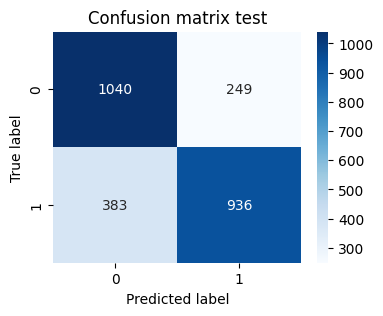

In [19]:
fig, ax = plt.subplots(figsize=(4, 3))
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_title('Confusion matrix test')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

plt.show()

In [20]:
print("Accuracy on test:", accuracy_score(y_test, y_pred_test))

Accuracy on test: 0.7576687116564417
